In [3]:
!pip install prettytable


In [4]:
import numpy as np
import os
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dense, Dropout, Flatten, Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from prettytable import PrettyTable

In [7]:
# Set the directory path where the text files are located
dir_path = r"C:\Users\HP\PycharmProjects\SachinSir_pro\my_lips_reading_1\Collected_data"

# Set the dimensions of each frame
height, width, channels = 80, 112, 3

# Initialize arrays to store the video frames and their corresponding labels
videos = []
labels = []
counter = 0
# Loop through each text file and extract the video frames
for root, dirs, files in os.walk(dir_path):
    

    for file in files:
        if file == "data.txt":

            # Extract the label from the directory name
            #label = root.split("/")[-1] 
            #label = label.split("_")[0]
            label = os.path.basename(root)  # Extracts "cherry_4"
            label = label.split("_")[0]     # Extracts "cherry"

            #if label not in wanted_words:
            #    continue
            counter += 1
            print(counter, end=" ")
            

            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Evaluate the contents of the text file as a Python expression
            data_list = eval(data_str)
            
            # Convert the list to a numpy array
            data_array = np.array(data_list)
            print(data_array.shape)

            # Reshape the data into a 4D array of shape (num_frames, height, width, channels)
            num_frames = len(data_list)
            frames = data_array.reshape((num_frames, height, width, channels))
            # Append the frames and label to the videos and labels arrays
            videos.append(frames)
            labels.append(label)
# print(labels)

# Convert the videos and labels arrays to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

# Save the videos and labels as separate .npy files
np.save("videosCorrect.npy", videos)
np.save("labelsCorrect.npy", labels)



1 (30, 80, 112, 3)
2 (30, 80, 112, 3)
3 (30, 80, 112, 3)
4 (30, 80, 112, 3)
5 (30, 80, 112, 3)
6 (30, 80, 112, 3)
7 (30, 80, 112, 3)
8 (30, 80, 112, 3)
9 (30, 80, 112, 3)
10 (30, 80, 112, 3)
11 (30, 80, 112, 3)
12 (30, 80, 112, 3)
13 (30, 80, 112, 3)
14 (30, 80, 112, 3)
15 (30, 80, 112, 3)
16 (30, 80, 112, 3)
17 (30, 80, 112, 3)
18 (30, 80, 112, 3)
19 (30, 80, 112, 3)
20 (30, 80, 112, 3)
21 (30, 80, 112, 3)
22 (30, 80, 112, 3)
23 (30, 80, 112, 3)
24 (30, 80, 112, 3)
25 (30, 80, 112, 3)
26 (30, 80, 112, 3)
27 (30, 80, 112, 3)
28 (30, 80, 112, 3)
29 (30, 80, 112, 3)
30 (30, 80, 112, 3)
31 (30, 80, 112, 3)
32 (30, 80, 112, 3)
33 (30, 80, 112, 3)
34 (30, 80, 112, 3)
35 (30, 80, 112, 3)
36 (30, 80, 112, 3)
37 (30, 80, 112, 3)
38 (30, 80, 112, 3)
39 (30, 80, 112, 3)
40 (30, 80, 112, 3)
41 (30, 80, 112, 3)
42 (30, 80, 112, 3)
43 (30, 80, 112, 3)
44 (30, 80, 112, 3)
45 (30, 80, 112, 3)
46 (30, 80, 112, 3)
47 (30, 80, 112, 3)
48 (30, 80, 112, 3)
49 (30, 80, 112, 3)
50 (30, 80, 112, 3)
51 (30, 8

In [9]:
videos = np.load('videosCorrect.npy')
labels = np.load('labelsCorrect.npy')


# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape)
print("Labels shape:", labels.shape)

Videos shape: (490, 30, 80, 112, 3)
Labels shape: (490,)


In [10]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
labels = encoded_labels

In [11]:
label_dict = {0: 'apple', 1: 'cherry', 2: 'fig', 3: 'hello', 4: 'hi', 5: 'okay', 6: 'order', 7: 'water'}

In [12]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

del videos

Training set shape: (392, 30, 80, 112, 3) (392,)
Test set shape: (98, 30, 80, 112, 3) (98,)


In [ ]:
# gc.collect()
# !systeminfo | findstr /C:"Total Physical Memory"
# !systeminfo | findstr /C:"Available Physical Memory"

In [13]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Find the maximum length of the class names for alignment
max_len = max([len(label_dict[i]) for i in range(len(label_dict))])

# Print the distribution of classes
for i, count in enumerate(counts):
    class_name = label_dict[i].ljust(max_len)
    print("{}  {} counts".format(class_name, count))

apple   34 counts
cherry  61 counts
fig     64 counts
hello   62 counts
hi      62 counts
okay    68 counts
order   71 counts
water   68 counts


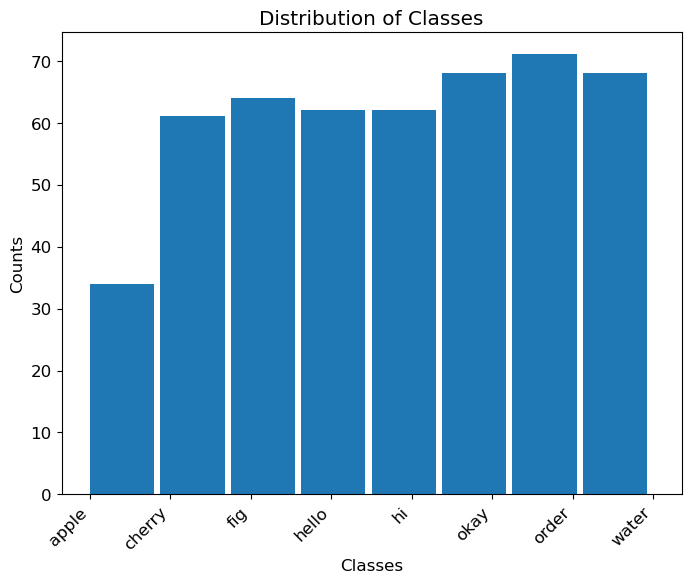

In [14]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Plot the histogram
plt.hist(labels, bins=len(classes), width=0.8)
plt.xticks(range(len(classes)), [label_dict[i] for i in range(len(classes))], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Classes')

# Display the plot
plt.show()

In [ ]:
# # input_shape = (30, 80, 112, 3)

# # model = Sequential()
# # model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
# # model.add(MaxPooling3D((2, 2, 2)))
# # model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# # model.add(MaxPooling3D((2, 2, 2)))
# # model.add(Conv3D(256, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# # model.add(Flatten())
# # model.add(Dense(1024, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(Dense(256, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(Dense(64, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(Dense(8, activation='softmax'))

# # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # # Convert the target labels to one-hot encoding
# # y_train_onehot = tf.keras.utils.to_categorical(y_train)
# # y_test_onehot = tf.keras.utils.to_categorical(y_test)
# # model.summary()

# from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, Flatten, Dense, Dropout
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.regularizers import l2
# input_shape = (30, 80, 112, 3)

# model = Sequential()

# model.add(Conv3D(16, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# model.add(Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))  # Dropout to prevent overfitting
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(8, activation='softmax'))  # Output layer for 8 classes

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()


In [15]:
from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import tensorflow as tf

In [18]:
from tensorflow.keras.layers import Input


# Define the input shape using the Input layer
input_shape = (30, 80, 112, 3)  # 30 frames of size 80x112 with 3 channels (RGB)

model = Sequential()

# Define the input layer with input_shape
model.add(Input(shape=input_shape))

# 1st Conv3D layer: Extract spatial-temporal features
model.add(Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# 2nd Conv3D layer: More complex feature extraction
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# 3rd Conv3D layer: Deeper feature extraction
model.add(Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Dense layer for classification (one less dense layer to avoid overfitting)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer with 8 classes (softmax activation for multi-class classification)
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert the target labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)


In [ ]:

# # Model summary
# model.summary()

In [ ]:
# # Train the model and record the history of training
# history = model.fit(X_train, y_train_onehot, epochs=20, batch_size=16, validation_data=(X_test, y_test_onehot))


# Ensure y_train and y_test are already defined as the labels (in categorical format)
# Convert the target labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=8)

# Train the model and record the history of training
history = model.fit(
    X_train, 
    y_train_onehot, 
    epochs=10, 
    batch_size=16, 
    validation_data=(X_test, y_test_onehot)
)


In [ ]:

# # Model summary
model.summary()

In [ ]:
# Plot the training and validation loss and accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()

In [ ]:
model.save_weights('model_weights4.h5')

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label.isdigit():
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

print(table)

In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

In [ ]:
# Convert y_true and y_pred to one-hot encoding
n_classes = len(np.unique(y_test))
y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = model.predict(X_test)
y_pred_bin = label_binarize(np.argmax(y_pred_bin, axis=1), classes=np.arange(n_classes))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves
plt.figure(figsize=(8,6))
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'magenta']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
             label='ROC curve of {0} (AUC = {1:0.2f})'
             ''.format(label_dict[i], roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=lw,
         label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Define the list of label strings in the order of their integer values
label_strings = [label_dict[i] for i in range(len(label_dict))]

# Generate the heatmap confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()